In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [2]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Mounted at /content/drive/


In [3]:
%time datos = pd.read_csv('data_equilibrada.csv')
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 121 ms, sys: 33.5 ms, total: 154 ms
Wall time: 891 ms
CPU times: user 2.41 s, sys: 83.6 ms, total: 2.5 s
Wall time: 2.51 s


In [4]:
datos.shape

(10532, 3)

In [5]:
outliers = pd.read_csv('outliers_medianas_2.csv').outliers
datos.drop(index=outliers.values,inplace=True)

In [6]:
bow = pd.read_csv('bow.csv')

In [7]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 924 ms, sys: 41 ms, total: 965 ms
Wall time: 979 ms


In [8]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.222347,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.219057,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.236220,0.228646,0.0,0.0,0.252016,0.227881,0.0,0.000000,0.0,0.0,0.227325,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.075963,0.07915,0.0,0.000000,0.081222,0.000000,0.0,0.0,0.175839,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.079471,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.082897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.123416,0.0,0.0,0.0,0.0,0.000000,0.36962,0.0,0.000000,0.000000,0.129670,0.0,0.0,0.000000,0.0,0.0,0.0,0.121591,0.0,0.0,0.000000,0.000000,0.0,0.137252,0.0,0.000000,0.0,0.0,0.000000,0.126913,0.0,0.0,0.000000,0.000000,0.0,0.135213,0.0,0.0,0.126180,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,0.405972,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.213272,0.0,0.0,0.000000,0.0,0.0,0.0,0.199983,0.0,0.0,0.213973,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.215651,0.208737,0.0,0.0,0.000000,0.208039,0.0,0.000000,0.0,0.0,0.207531,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10225,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10226,0.000000,0.0,0.0,0.0,0.0,0.207130,0.00000,0.0,0.229348,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.216695,0.0,0.000000,0.0,0.502178,0.0,0.0,

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [10]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
max_depths = np.arange(10,110,10)
for max_depth in max_depths:
    print("max_depth:",max_depth)
    knn = DecisionTreeClassifier(max_depth=max_depth,class_weight='balanced')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

max_depth: 10
Train:
[[ 693    7   18  214 1260]
 [   3 1229  166   18  231]
 [  20   45 1097   58  373]
 [  20    2   13  594  841]
 [  14    4    0  172 1091]]
              precision    recall  f1-score   support

           0       0.92      0.32      0.47      2192
           1       0.95      0.75      0.84      1647
           2       0.85      0.69      0.76      1593
           3       0.56      0.40      0.47      1470
           4       0.29      0.85      0.43      1281

    accuracy                           0.57      8183
   macro avg       0.72      0.60      0.59      8183
weighted avg       0.75      0.57      0.59      8183

Test:
[[192   5   8  52 305]
 [  0 319  41   5  62]
 [  3  18 229  17 101]
 [  7   1   3 132 213]
 [  4   0   0  39 290]]
              precision    recall  f1-score   support

           0       0.93      0.34      0.50       562
           1       0.93      0.75      0.83       427
           2       0.81      0.62      0.71       368
          

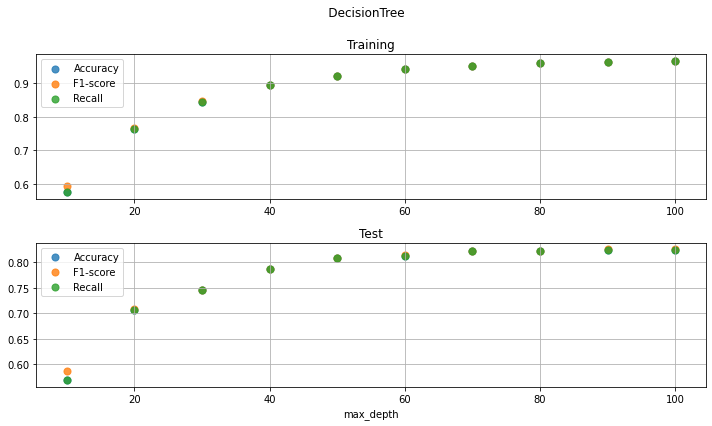

In [11]:
fig,ax=plt.subplots(2,1,figsize=(10,6),tight_layout=True)
fig.suptitle("     DecisionTree")
ax[0].scatter(max_depths,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(max_depths,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(max_depths,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')
# ax[0].set_xlabel('max_depth')

ax[1].scatter(max_depths,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(max_depths,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(max_depths,recall_test,s=50,alpha=0.8, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('max_depth')

plt.show()